In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
credit_card__df = pd.read_csv('C:/Users/chigup01/Downloads/UCI_Credit_Card/UCI_Credit_Card.csv')
type(credit_card__df)

pandas.core.frame.DataFrame

In [3]:
#Changing the Name of Column
credit_card__df.rename(columns = {'PAY_0':'PAY_1' , 'default.payment.next.month': 'DEFAULT'}, inplace = True)

In [4]:
credit_card__df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
credit_card__df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit_card__df['LIMIT_BAL'].value_counts().nlargest(10)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
150000.0    1110
100000.0    1048
180000.0     995
360000.0     881
60000.0      825
Name: LIMIT_BAL, dtype: int64

In [7]:
credit_card__df['EDUCATION'] = np.where(credit_card__df['EDUCATION'] == 5, 4, credit_card__df['EDUCATION'])
credit_card__df['EDUCATION']=np.where(credit_card__df['EDUCATION'] == 6, 4, credit_card__df['EDUCATION'])
credit_card__df['EDUCATION']=np.where(credit_card__df['EDUCATION'] == 0, 4, credit_card__df['EDUCATION'])

In [8]:
credit_card__df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [9]:
credit_card__df['MARRIAGE'] = np.where(credit_card__df['MARRIAGE'] == 0, 3, credit_card__df['MARRIAGE'])

In [10]:
credit_card__df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [11]:
credit_card__df.isnull().sum()
print('There is no Missing Value in the Dataset')

There is no Missing Value in the Dataset


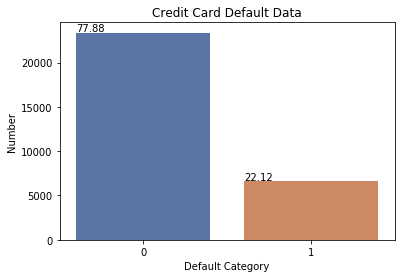

In [12]:
#Analysis of the Data
default_data = credit_card__df['DEFAULT'].value_counts()
default_chart = sns.barplot(default_data.index, default_data.values,  palette="deep")

#Annotate the Bar Chart
default_list = []
total_data_length = len(credit_card__df['DEFAULT'])
for i in range(len(default_data)):
    default_perc = (default_data.values[i] / total_data_length) * 100
    default_list.append(default_perc)

count = 0
for p in default_chart.patches:
    default_chart.annotate(round(default_list[count],2), (p.get_x() * 1.008, p.get_height() * 1.008))
    count = count + 1
                           
plt.xlabel('Default Category')
plt.ylabel('Number')
plt.title('Credit Card Default Data')
plt.show()

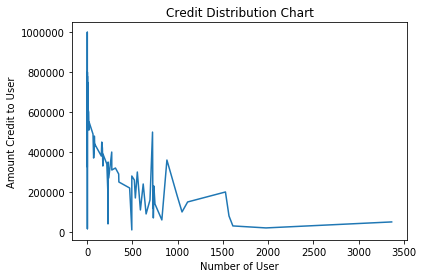

In [13]:
Limit_data = credit_card__df['LIMIT_BAL'].value_counts()
plt.plot(Limit_data.values, Limit_data.index)
plt.ylabel('Amount Credit to User')
plt.xlabel('Number of User')
plt.title('Credit Distribution Chart')
plt.show()

<Figure size 1296x1296 with 0 Axes>

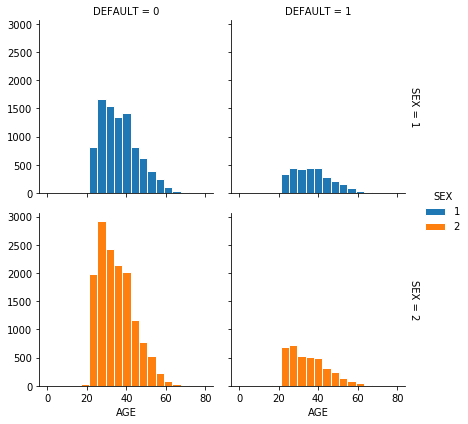

SEX         1      2
DEFAULT             
0        9015  14349
1        2873   3763
Women Pecentage who are Defaulter: 20.78 %
Men Pecentage who are Defaulter: 24.17 %
Men with Age from 20-40 are more Likely to be Defaulter, when compare with Women with Same Age Group


C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [14]:
#Affect of Education on Default Credit Card List
plt.figure(figsize=(18,18))
g = sns.FacetGrid(credit_card__df, row= 'SEX', col="DEFAULT", hue = "SEX",  margin_titles=True)
bins = np.linspace(0, 80, 20)
g.map(plt.hist, "AGE", bins=bins, edgecolor="w").add_legend()
plt.show()

print(pd.crosstab(credit_card__df.DEFAULT, credit_card__df.SEX))
num_women_default = len(credit_card__df[credit_card__df.DEFAULT == 1][credit_card__df.SEX == 2])
women_default_perc = num_women_default / len(credit_card__df[credit_card__df.SEX == 2]) * 100
print("Women Pecentage who are Defaulter: " +str(round(women_default_perc,2))+ " %")
num_men_default = len(credit_card__df[credit_card__df.DEFAULT == 1][credit_card__df.SEX == 1])
men_default_perc = num_men_default / len(credit_card__df[credit_card__df.SEX == 1]) * 100
print("Men Pecentage who are Defaulter: " +str(round(men_default_perc,2))+ " %")
print("Men with Age from 20-40 are more Likely to be Defaulter, when compare with Women with Same Age Group")

<Figure size 1296x1296 with 0 Axes>

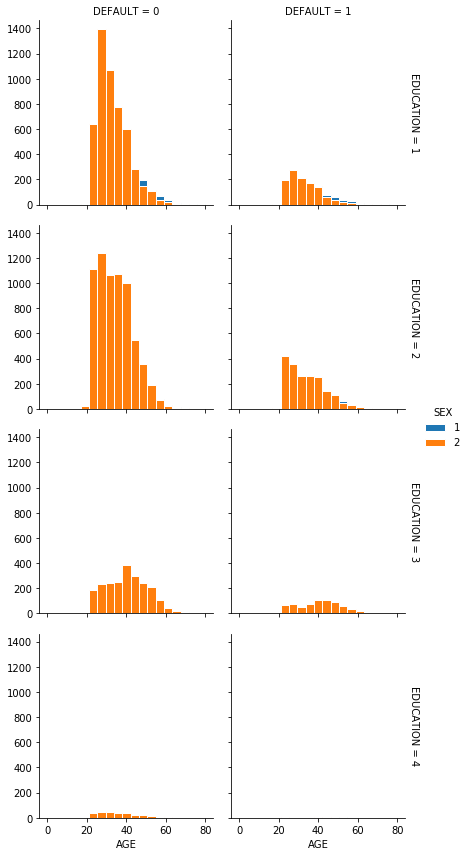

People with Graduate and University Degree are more likely to be Defaulter


In [15]:
#Affect of Education on Default Credit Card List
plt.figure(figsize=(18,18))
g = sns.FacetGrid(credit_card__df, row= 'EDUCATION', col="DEFAULT", hue = "SEX",  margin_titles=True)
bins = np.linspace(0, 80, 20)
g.map(plt.hist, "AGE", bins=bins, edgecolor="w").add_legend()
plt.show()

print('People with Graduate and University Degree are more likely to be Defaulter')

<Figure size 1296x1296 with 0 Axes>

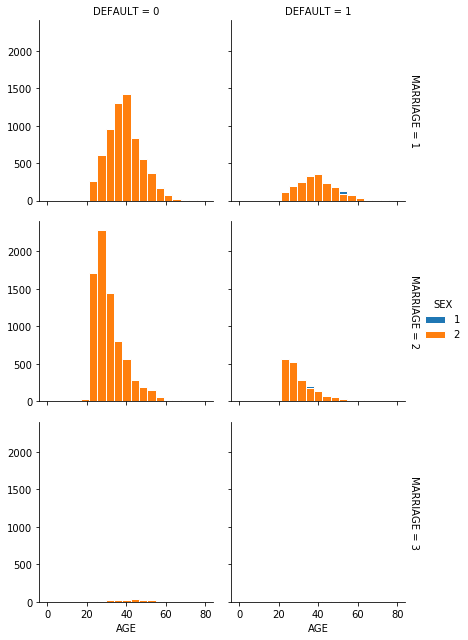

In [16]:
plt.figure(figsize=(18,18))
g = sns.FacetGrid(credit_card__df, row= 'MARRIAGE', col="DEFAULT", hue = "SEX",  margin_titles=True)
bins = np.linspace(0, 80, 20)
g.map(plt.hist, "AGE", bins=bins, edgecolor="w").add_legend()
plt.show()

In [17]:
# Feature Selection Progess
credit_card__df = credit_card__df.drop(labels= 'ID', axis=1)

In [18]:
credit_card__df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
#Feature Selection using Univariate Slection

#Independent Column
X = credit_card__df.iloc[:,0:23]
Y = credit_card__df.iloc[:, -1]

#In order to get top 10 feature, We are using SelectKbest class
bestfeatures = SelectKBest(score_func= f_regression, k =15)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(X.columns)
featurescore_chi2 = pd.concat([dfcolumn, dfscores], axis =1 )
featurescore_chi2.columns = ['Features','Score']  
print(featurescore_chi2.nlargest(15,'Score'))

     Features        Score
5       PAY_1  3537.714970
6       PAY_2  2239.169136
7       PAY_3  1757.466444
8       PAY_4  1476.845967
9       PAY_5  1304.591176
10      PAY_6  1085.402485
0   LIMIT_BAL   724.068539
17   PAY_AMT1   160.403810
18   PAY_AMT2   103.291524
20   PAY_AMT4    97.188000
19   PAY_AMT3    95.218011
21   PAY_AMT5    91.429801
22   PAY_AMT6    85.089045
1         SEX    47.978854
2   EDUCATION    34.395999


In [20]:
#Splitting the data into two dataset
y = credit_card__df.DEFAULT
x = credit_card__df.drop('DEFAULT', axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size =0.20)

In [21]:
features = X_train.columns
print(type(features))
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [22]:
X_train_independent = X_train.iloc[:,0:23]
X_train_target = X_train.iloc[:,-1]

#Feature Slection using Wrapper Method 
feature_model = ExtraTreesClassifier().fit(X,Y)

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


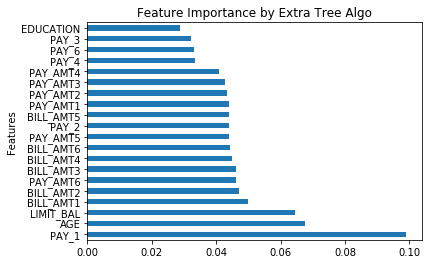

In [23]:
#Lets plot graph for better understanding
feature_importance = pd.Series(feature_model.feature_importances_, index= X.columns)
feature_importance.nlargest(20).plot(kind= 'barh')
plt.title('Feature Importance by Extra Tree Algo')
plt.ylabel('Features')
plt.show()

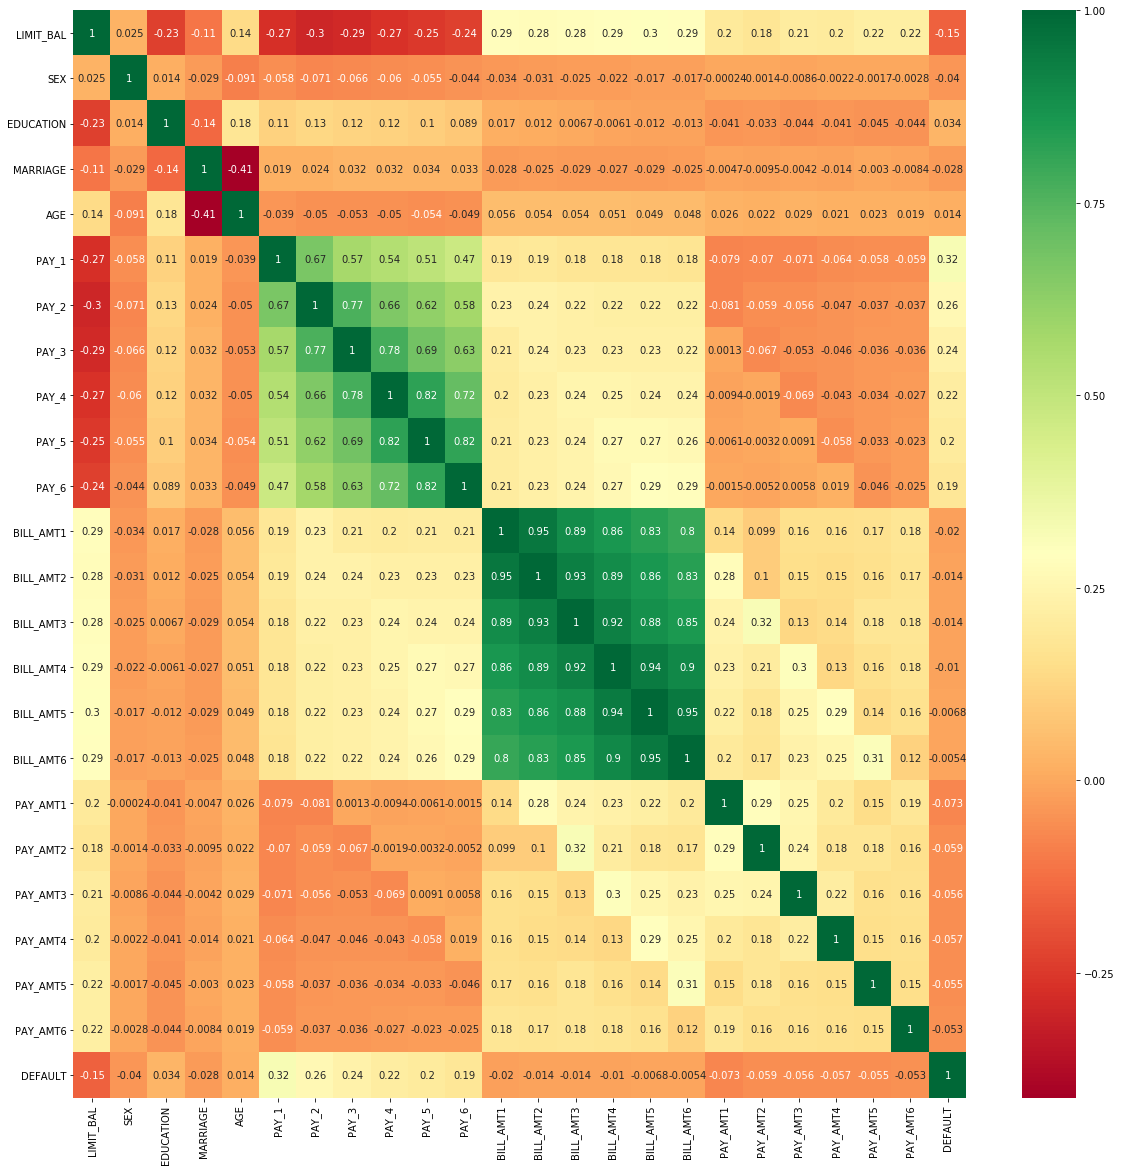

It is clear Pay_1 to Pay_6 and Age play are important feature.


In [24]:
#Correlation HeatMap to check corelation between feature 
dataset_correlation = credit_card__df.corr()
top_corr_feature = dataset_correlation.index
plt.figure(figsize=(20,20))
sns.heatmap(credit_card__df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.show()
print('It is clear Pay_1 to Pay_6 and Age play are important feature.')

In [25]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14064,200000.0,1,1,2,38,-2,-2,-2,-2,-2,...,1081.0,1884.0,2089.0,7097.0,0.0,1093.0,1893.0,2097.0,7132.0,488.0
23415,20000.0,2,2,1,46,4,3,2,3,2,...,17021.0,16461.0,15901.0,16294.0,0.0,2277.0,0.0,0.0,800.0,1400.0
4645,360000.0,1,1,2,29,-1,0,0,0,-1,...,40165.0,20733.0,12525.0,7482.0,5135.0,20856.0,103.0,12587.0,7518.0,6412.0
22439,260000.0,2,2,1,38,0,0,0,0,0,...,85128.0,86910.0,88637.0,90682.0,2984.0,3100.0,3200.0,3172.0,3473.0,6994.0
8389,20000.0,1,2,2,24,1,2,3,2,2,...,17755.0,17967.0,17538.0,18647.0,2200.0,0.0,800.0,0.0,1401.0,0.0


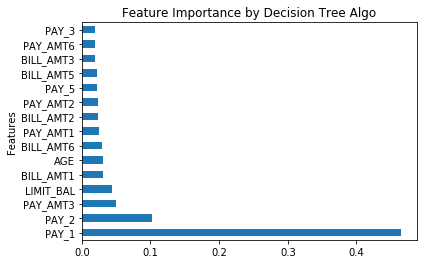

Accuracy of Model with All Feature
0.8105


In [26]:
#Lets put all the attribute in Model, Look how our model performs using Decision Tree Algo

features = X_train.columns
decision_model = DecisionTreeClassifier(max_depth= 10, random_state= 123).fit(X_train, Y_train)
desicion_prediction = decision_model.predict(X_test)
feature_importance = pd.Series(decision_model.feature_importances_, index = features)
feature_importance.nlargest(15).plot(kind = 'barh')
plt.title('Feature Importance by Decision Tree Algo')
plt.ylabel('Features')
plt.show()
print('Accuracy of Model with All Feature')
print(accuracy_score(y_true = Y_test, y_pred = desicion_prediction))


In [27]:
#Checking Model Performance using Logistics Regression Algo
logistic_model = LogisticRegression(random_state= 11)
logistic_model.fit(X_train, Y_train)
prediction = logistic_model.predict(X_test)
print('Accuracy of Model with All Feature')
#print(logistic_model.score(Y_test.values.reshape(-1,1), prediction))
print(accuracy_score(y_true = Y_test, y_pred = prediction))

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model with All Feature
0.7795


In [28]:
#Looking feature Selection with another Wrapper Method using Recursive Feature Elminiation
#Feature Selection for Logistic Regression Model
wrapper_model = LogisticRegression()
rfe = RFE(wrapper_model,5)
fit = rfe.fit(X,Y)
accuracy_score = rfe.score(X,Y)

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-package

In [29]:
print("Number of Feature Selected: %s" %(fit.n_features_))
print("Feature that are Selected: %s" %(fit.support_))
print("Ranking of the Feature: %s" %(fit.ranking_))
print("Model Score = %f" %(accuracy_score.mean()))
feature_importance_rfe = pd.DataFrame({'Feature':features, 'Value':fit.support_})
features_array = np.array(features)
print("Some important feature by RFE Model %s" %(features_array[rfe.support_]))

Number of Feature Selected: 5
Feature that are Selected: [False  True False  True False  True  True  True False False False False
 False False False False False False False False False False False]
Ranking of the Feature: [15  1  3  1  5  1  1  1  4  2  6 12 13 16 19 14 17  7  8 11  9 10 18]
Model Score = 0.810333
Some important feature by RFE Model ['SEX' 'MARRIAGE' 'PAY_1' 'PAY_2' 'PAY_3']


In [30]:
#Cross Validation on Logistic Regression
cross_val_lr = cross_val_score(logistic_model, X_train, Y_train, cv = 5, scoring= 'accuracy')
print(cross_val_lr.mean())

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-package

0.7785833343261719


In [31]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4677
           1       0.00      0.00      0.00      1323

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from sklearn.metrics import accuracy_score
#Logistic Regression with most Important Features 
X_train_imp_feat = credit_card__df[['SEX','MARRIAGE','PAY_1','PAY_2','PAY_3']]
X_train_imp_rfe, X_test_imp_rfe, Y_train_imp_rfe, Y_test_imp_rfe = train_test_split(X_train_imp_feat, y, test_size =0.20)
Lr_imp = LogisticRegression(random_state= 100)
Lr_imp.fit(X_train_imp_rfe, Y_train_imp_rfe)
Lr_imp_predict = Lr_imp.predict(X_test_imp_rfe)
print("Accuracy of Logistic regression model with Imp Features: ", accuracy_score(y_true = Y_test_imp_rfe, y_pred = Lr_imp_predict))

#Do Cross Validation with 5 Folds
Lr_imp_cv = cross_val_score(Lr_imp, X_train_imp_feat, y, cv = 5)
print(classification_report(Y_test_imp_rfe, Lr_imp_predict))

Accuracy of Logistic regression model with Imp Features:  0.8075


C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4660
           1       0.72      0.23      0.35      1340

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
param_grid_gs = {"max_depth": [1,2,3,4,5,6,7,8,9],"max_features": [1,2,3,4,5,6,7,8,9],"max_leaf_nodes": [5,10,20,100],"min_samples_leaf": [1,2,3,4,5,6,7,8,9],"criterion": ["gini", "entropy"]}

decision_tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree_model, param_grid_gs, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, Y_train)
print('Best hyperparameters by Grid Search: ', grid_search.best_estimator_)
print('Score: ' ,np.abs(grid_search.best_score_))

Best hyperparameters by Grid Search:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=8, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Score:  0.819375


Accuracy:  0.8196666666666667

Accuracy of Decision Tree Model increased using Hyper Parameter

Accuracy Score with Cross validation:  0.8139151368125239



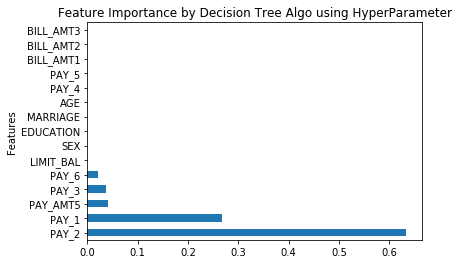

In [34]:
#Training Model with HyperParamters

decision_model_hp = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=9, max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state= 123, splitter='best')
decision_model_hp.fit(X_train, Y_train)
decision_predict = decision_model_hp.predict(X_test)
print('Accuracy: ', accuracy_score(y_true = Y_test, y_pred  = decision_predict))
print()
print('Accuracy of Decision Tree Model increased using Hyper Parameter')

# Cross Validation on Decision Tree 

decision_cv = cross_val_score(decision_model_hp, X_train, Y_train, cv = 10, scoring= 'accuracy')
print()
print('Accuracy Score with Cross validation: ', decision_cv.mean())
print()

#lets Check important feature for model with HyperParameter
feature_importance = pd.Series(decision_model_hp.feature_importances_, index = features)
feature_importance.nlargest(15).plot(kind = 'barh')
plt.title('Feature Importance by Decision Tree Algo using HyperParameter')
plt.ylabel('Features')
plt.show()

Lets try to improve the accuracy of model using Important Feature 

Accuracy Using Important Feature:  0.817

Accuracy Score with Cross validation:  0.8213747620586972

Accuracy of the Decision Tree model increased with using HyperParameters and Important Features



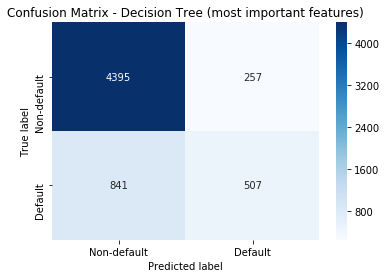


True Positive : 507, True Negative : 4395, False Positive : 257, False Negative: 841

CLassification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4652
           1       0.66      0.38      0.48      1348

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [35]:
print('Lets try to improve the accuracy of model using Important Feature ')
train_feature_decision = credit_card__df[['PAY_1', 'PAY_2', 'PAY_AMT2', 'PAY_6', 'PAY_3', 'BILL_AMT1', 'PAY_5']]
X_train_imp_decision, X_test_imp_decision, Y_train_imp_decision, Y_test_imp_decision = train_test_split(train_feature_decision, y, test_size =0.20)

#Change the value of Max Feature 
decision_model_hp = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=7, max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state= 100, splitter='best')
decision_model_hp.fit(X_train_imp_decision, Y_train_imp_decision)
decision_predict = decision_model_hp.predict(X_test_imp_decision)
print()
print('Accuracy Using Important Feature: ', accuracy_score(y_true = Y_test_imp_decision, y_pred  = decision_predict))
print()

# Cross Validation on Decision Tree 

decision_cv = cross_val_score(decision_model_hp, X_train_imp_decision, Y_train_imp_decision, cv = 10, scoring= 'accuracy')
print('Accuracy Score with Cross validation: ', decision_cv.mean())
print()
print('Accuracy of the Decision Tree model increased with using HyperParameters and Important Features')
print()

#Confusion Matrix
cm_decision = confusion_matrix(Y_test_imp_decision, decision_predict)
sns.heatmap(cm_decision,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree (most important features)");
plt.show()

print('')

TP = np.sum(np.logical_and(Y_test_imp_decision ==1,decision_predict == 1))
TN = np.sum(np.logical_and(Y_test_imp_decision ==0,decision_predict == 0))
FP = np.sum(np.logical_and(Y_test_imp_decision ==0,decision_predict == 1))
FN = np.sum(np.logical_and(Y_test_imp_decision ==1,decision_predict == 0))

print('True Positive : {}, True Negative : {}, False Positive : {}, False Negative: {}'.format(TP, TN, FP, FN))
print()
print('CLassification Report: ')
print(classification_report(Y_test_imp_decision, decision_predict))

In [36]:
print('It is clear from the above report that data is highly imbalanced as f-1 score on Non-Defaulter is') 
print('pretty high as compare to Defaulter Category')
print('To solve this problem, we will look for UnderSampling and Over Sampling Technique')

It is clear from the above report that data is highly imbalanced as f-1 score on Non-Defaulter is
pretty high as compare to Defaulter Category
To solve this problem, we will look for UnderSampling and Over Sampling Technique


In [37]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
  - defaults/win-64::numba==0.43.1=py37hf9181ef_0
done

## Package Plan ##

  environment location: C:\Users\chigup01\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           5 KB
    anaconda-custom            |           py37_1           2 KB
    ca-certificates-2019.6.16  |       hecc5488_0         183 KB  conda-forge
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    openssl-1.1.1c             |       hfa6e2cd_0         4.7 MB  conda-forge
    tbb-2019.7                 |       he980bc4_0         161 KB  conda-forge
 

In [38]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

sm = SMOTE(random_state=27, sampling_strategy='auto')
X_train_sm, Y_train_sm = sm.fit_sample(X_train, Y_train)
decision_model_hp.fit(X_train_sm, Y_train_sm)
decision_predict = decision_model_hp.predict(X_test)
print()
print('Accuracy Using Important Feature: ', accuracy_score(y_true = Y_test, y_pred  = decision_predict))
print()
print('CLassification Report: ')
print(classification_report(Y_test, decision_predict))


Accuracy Using Important Feature:  0.7268333333333333

CLassification Report: 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4677
           1       0.41      0.57      0.48      1323

    accuracy                           0.73      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.76      0.73      0.74      6000



In [39]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, Y_train)
preds = bbc.predict(X_test)

print('Accuracy Using Important Feature: ', accuracy_score(y_true = Y_test, y_pred  = preds))
print()
print('CLassification Report: ')
print(classification_report(Y_test, preds))

Accuracy Using Important Feature:  0.7701666666666667

CLassification Report: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4677
           1       0.48      0.53      0.50      1323

    accuracy                           0.77      6000
   macro avg       0.67      0.68      0.68      6000
weighted avg       0.78      0.77      0.77      6000



In [40]:
clf = RandomForestClassifier()
params = {'max_depth': [1,2,3,4,5,6,7,8,9],
            "criterion": ["gini", "entropy"]}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)
gs.fit(X_train, Y_train)
print('Best hyperparameters by Grid Search: ', gs.best_estimator_)
print('Tuned Random Forest Parameter: ', gs.best_params_)
print('Score: ' ,np.abs(grid_search.best_score_))

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\chigup01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

Best hyperparameters by Grid Search:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Tuned Random Forest Parameter:  {'criterion': 'gini', 'max_depth': 8}
Score:  0.819375


Accuracy:  0.8165


Accuracy Score with Cross validation:  0.8137486264465208



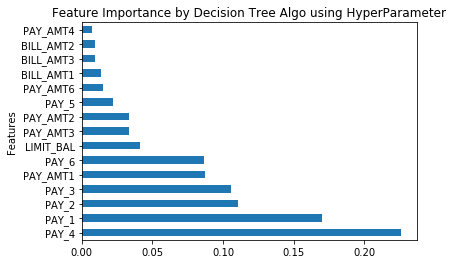

In [41]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF.fit(X_train, Y_train)
random_forest_predict = RF.predict(X_test)
print('Accuracy: ', accuracy_score(y_true = Y_test, y_pred  = random_forest_predict))
print()

# Cross Validation on Decision Tree 

decision_cv = cross_val_score(RF, X_train, Y_train, cv = 10, scoring= 'accuracy')
print()
print('Accuracy Score with Cross validation: ', decision_cv.mean())
print()

#lets Check important feature for model with HyperParameter
feature_importance = pd.Series(RF.feature_importances_, index = features)
feature_importance.nlargest(15).plot(kind = 'barh')
plt.title('Feature Importance by Decision Tree Algo using HyperParameter')
plt.ylabel('Features')
plt.show()

Lets try to improve the accuracy of model using Important Feature 

Accuracy Using Important Feature:  0.8148333333333333

Accuracy Score with Cross validation:  0.8227498313295424

Accuracy of the Random Tree model increased with using HyperParameters and Important Features



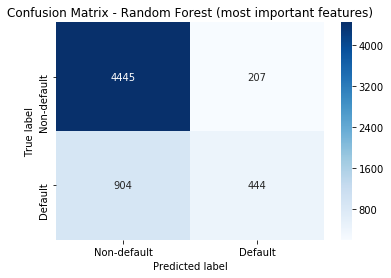


True Positive : 444, True Negative : 4445, False Positive : 207, False Negative: 904

CLassification Report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4652
           1       0.68      0.33      0.44      1348

    accuracy                           0.81      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.81      0.79      6000



In [42]:
print('Lets try to improve the accuracy of model using Important Feature ')
train_feature_decision = credit_card__df[['PAY_1', 'PAY_4', 'PAY_2', 'PAY_6', 'PAY_5', 'PAY_AMT1', 'LIMIT_BAL']]
X_train_imp_random, X_test_imp_random, Y_train_imp_random, Y_test_imp_random = train_test_split(train_feature_decision, y, test_size =0.20)

#Change the value of Max Feature data
random_forest_model_hp = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state= 123,
                       verbose=0, warm_start=False)
random_forest_model_hp.fit(X_train_imp_random, Y_train_imp_random)
random_forest_predict = random_forest_model_hp.predict(X_test_imp_random)
print()
print('Accuracy Using Important Feature: ', accuracy_score(y_true = Y_test_imp_random, y_pred  = random_forest_predict))
print()

# Cross Validation on Decision Tree 

random_forest_cv = cross_val_score(random_forest_model_hp, X_train_imp_random, Y_train_imp_random, cv = 10, scoring= 'accuracy')
print('Accuracy Score with Cross validation: ', random_forest_cv.mean())
print()
print('Accuracy of the Random Tree model increased with using HyperParameters and Important Features')
print()

#Confusion Matrix
cm_decision = confusion_matrix(Y_test_imp_random, random_forest_predict)
sns.heatmap(cm_decision,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest (most important features)");
plt.show()

print('')

TP = np.sum(np.logical_and(Y_test_imp_random == 1, random_forest_predict == 1))
TN = np.sum(np.logical_and(Y_test_imp_random == 0, random_forest_predict == 0))
FP = np.sum(np.logical_and(Y_test_imp_random ==0, random_forest_predict == 1))
FN = np.sum(np.logical_and(Y_test_imp_random ==1, random_forest_predict == 0))

print('True Positive : {}, True Negative : {}, False Positive : {}, False Negative: {}'.format(TP, TN, FP, FN))
print()
print('CLassification Report: ')
print(classification_report(Y_test_imp_random, random_forest_predict))

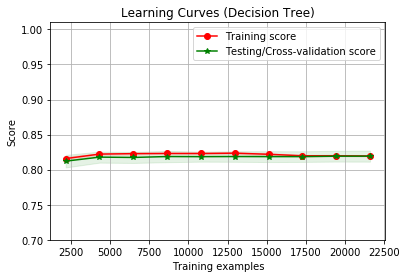

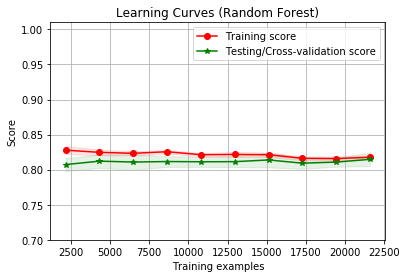

In [43]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, training_sample_sizes = np.linspace(0.1,1.0,10),
                      n_jobs=  1):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes = training_sample_sizes, cv=cv, n_jobs = 1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, marker= '*', color="g",
             label="Testing/Cross-validation score")

    plt.legend(loc="best")
    return plt



title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = KFold(n_splits=10, shuffle=False, random_state=0)
estimator = decision_model_hp
plot_learning_curve(estimator, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

title = "Learning Curves (Random Forest)"
# SVC is more expensive so we do a lower number of CV iterations:
estimator = RF
plot_learning_curve(estimator, title, X_train, Y_train, (0.7, 1.01), cv=cv, n_jobs=1)

plt.show()

In [44]:
#FEATURE ENGINEERING 
print("Since from the above Exploration of Data, it was clear that Married Man were more likely to be Defaulter than Unmaried Man!!")
credit_card__df['SEX_MARRIAGE'] = 0
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.MARRIAGE == 1)), 'SEX_MARRIAGE'] = 1 #Married Man
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.MARRIAGE == 2)), 'SEX_MARRIAGE'] = 2 #Single Man
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.MARRIAGE == 3)), 'SEX_MARRIAGE'] = 3 #Divorced Man
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.MARRIAGE == 1)), 'SEX_MARRIAGE'] = 4 #Married Woman
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.MARRIAGE == 2)), 'SEX_MARRIAGE'] = 5 #Single Woman
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.MARRIAGE == 3)), 'SEX_MARRIAGE'] = 6 #Divorced Woman
result_cross_tab = credit_card__df.groupby(['SEX_MARRIAGE', 'DEFAULT']).size().unstack()
result_cross_tab['percentage'] = (result_cross_tab[result_cross_tab.columns[1]]/ (result_cross_tab[result_cross_tab.columns[0]] 
                                                                                 + result_cross_tab[result_cross_tab.columns[1]]))
result_cross_tab

Since from the above Exploration of Data, it was clear that Married Man were more likely to be Defaulter than Unmaried Man!!


DEFAULT,0,1,percentage
SEX_MARRIAGE,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


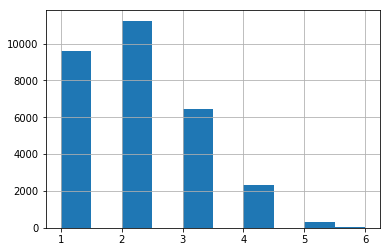

In [45]:
credit_card__df['AGE_BIN'] = 0
credit_card__df.loc[((credit_card__df['AGE'] >= 20) & (credit_card__df['AGE'] < 30)), 'AGE_BIN'] = 1 #People between 20-30
credit_card__df.loc[((credit_card__df['AGE'] >= 30) & (credit_card__df['AGE'] < 40)), 'AGE_BIN'] = 2 #People between 30-40
credit_card__df.loc[((credit_card__df['AGE'] >= 40) & (credit_card__df['AGE'] < 50)), 'AGE_BIN'] = 3 #People between 40-50
credit_card__df.loc[((credit_card__df['AGE'] >= 50) & (credit_card__df['AGE'] < 60)), 'AGE_BIN'] = 4 #People between 50-60
credit_card__df.loc[((credit_card__df['AGE'] >= 60) & (credit_card__df['AGE'] < 70)), 'AGE_BIN'] = 5 #People between 60-70
credit_card__df.loc[((credit_card__df['AGE'] >= 70) & (credit_card__df['AGE'] < 80)), 'AGE_BIN'] = 6 #People between 70-80
credit_card__df.AGE_BIN.hist()

In [46]:
result_cross_tab = credit_card__df.groupby(['AGE_BIN', 'SEX']).size().unstack()
result_cross_tab['percentage'] = (result_cross_tab[result_cross_tab.columns[1]]/ (result_cross_tab[result_cross_tab.columns[0]] 
                                                                                 + result_cross_tab[result_cross_tab.columns[1]]))
result_cross_tab

SEX,1,2,percentage
AGE_BIN,,,
1,3281,6337,0.658869
2,4565,6673,0.593789
3,2771,3693,0.571318
4,1092,1249,0.533533
5,166,148,0.471338
6,13,12,0.480000


In [47]:
#credit_card__df

In [48]:
credit_card__df['SEX_AGEBIN'] = 0
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.AGE_BIN == 1)) , 'SEX_AGEBIN'] = 1 #man in 20's
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.AGE_BIN == 2)) , 'SEX_AGEBIN'] = 2 #man in 30's
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.AGE_BIN == 3)) , 'SEX_AGEBIN'] = 3 #man in 40's
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.AGE_BIN == 4)) , 'SEX_AGEBIN'] = 4 #man in 50's
credit_card__df.loc[((credit_card__df.SEX == 1) & (credit_card__df.AGE_BIN == 5)) , 'SEX_AGEBIN'] = 5 #man in 60's and above
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.AGE_BIN == 1)) , 'SEX_AGEBIN'] = 6 #woman in 20's
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.AGE_BIN == 2)) , 'SEX_AGEBIN'] = 7 #woman in 30's
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.AGE_BIN == 3)) , 'SEX_AGEBIN'] = 8 #woman in 40's
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.AGE_BIN == 4)) , 'SEX_AGEBIN'] = 9 #woman in 50's
credit_card__df.loc[((credit_card__df.SEX == 2) & (credit_card__df.AGE_BIN == 5)) , 'SEX_AGEBIN'] = 10 #woman in 60's and above


result_cross_tab = credit_card__df.groupby(['SEX_AGEBIN', 'DEFAULT']).size().unstack()
result_cross_tab['percentage'] = (result_cross_tab[result_cross_tab.columns[1]]/ (result_cross_tab[result_cross_tab.columns[0]] 
                                                                                 + result_cross_tab[result_cross_tab.columns[1]]))
result_cross_tab

DEFAULT,0,1,percentage
SEX_AGEBIN,,,
0,18,7,0.280000
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,122,44,0.265060
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001


In [49]:
#credit_card__df.dtypes

In [50]:
#How Far is Bill from Limit can be Important Variable. Lets try that also.
#credit_card__df['Closeness_6'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT6) / credit_card__df.LIMIT_BAL
#credit_card__df['Closeness_5'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT5) / credit_card__df.LIMIT_BAL
#credit_card__df['Closeness_4'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT4) / credit_card__df.LIMIT_BAL
#credit_card__df['Closeness_3'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT3) / credit_card__df.LIMIT_BAL
#credit_card__df['Closeness_2'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT2) / credit_card__df.LIMIT_BAL
#credit_card__df['Closeness_1'] = (credit_card__df.LIMIT_BAL - credit_card__df.BILL_AMT1) / credit_card__df.LIMIT_BAL

In [51]:
#credit_card__df["DEFAULT"] = credit_card__df["DEFAULT"].astype('category')

In [52]:
credit_card__df.dtypes

LIMIT_BAL       float64
SEX               int64
EDUCATION         int64
MARRIAGE          int64
AGE               int64
PAY_1             int64
PAY_2             int64
PAY_3             int64
PAY_4             int64
PAY_5             int64
PAY_6             int64
BILL_AMT1       float64
BILL_AMT2       float64
BILL_AMT3       float64
BILL_AMT4       float64
BILL_AMT5       float64
BILL_AMT6       float64
PAY_AMT1        float64
PAY_AMT2        float64
PAY_AMT3        float64
PAY_AMT4        float64
PAY_AMT5        float64
PAY_AMT6        float64
DEFAULT           int64
SEX_MARRIAGE      int64
AGE_BIN           int64
SEX_AGEBIN        int64
dtype: object

In [53]:
credit_card__df.to_csv('CreditCardFraud_FE.csv', encoding='utf-8')

In [54]:
credit_card__df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_MARRIAGE,AGE_BIN,SEX_AGEBIN
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,4,1,6
1,120000.0,2,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,5,1,6
2,90000.0,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,5,2,7
3,50000.0,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,4,2,7
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,4,4
5,50000.0,1,1,2,37,0,0,0,0,0,...,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,2,2,2
6,500000.0,1,1,2,29,0,0,0,0,0,...,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,2,1,1
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,380.0,601.0,0.0,581.0,1687.0,1542.0,0,5,1,6
8,140000.0,2,3,1,28,0,0,2,0,0,...,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,4,1,6
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,0.0,0.0,0.0,13007.0,1122.0,0.0,0,2,2,2
